<a href="https://colab.research.google.com/github/Jeromy0515/machine-learning/blob/main/k-nearest-neighbor/machine_learning2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 전체 데이터 리스트(생선의 길이와 무게)
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]  

In [7]:
import numpy as np
np.column_stack(([1,2,3], [4,5,6])) # column_stack는 각 배열의 인덱스를 짝지어 2차원 배열로 분류함

array([[1, 4, 6],
       [2, 5, 7],
       [3, 6, 9]])

In [3]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])
fish_data.shape

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


(49, 2)

In [6]:
print(np.ones(5))  # ones는 1로 가득찬 array를 생성 np.ones(shape, dtype, order)
print(np.zeros(5)) # zeros는 0으로 가득 찬 array를 생성 np.zeros(shape, dtype, order)

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [8]:
fish_target = np.concatenate((np.ones(35), np.zeros(14))) # concatenate 함수로 배열 합치기
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [10]:
from sklearn.model_selection import train_test_split

# train_test_split() default 75:25
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42
)
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


In [11]:
# 샘플링 편향
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [12]:
# stratify 매개변수
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42
)
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [14]:
if kn.predict([[25, 150]]) == 0:
  print('빙어')
else:
  print('도미')

빙어


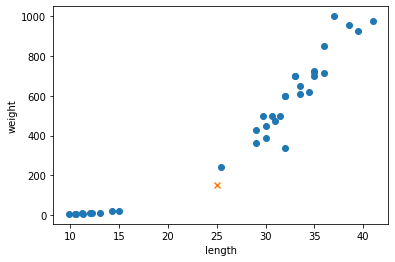

In [15]:
# 산점도 그리기
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='x')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [16]:
# 가장 가까운 5개의 거리와 인덱스 저장
distances, indexes = kn.kneighbors([[25, 150]])

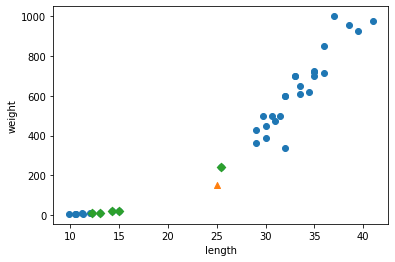

In [18]:
# 인덱스를 이용해 산점도 그리기
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [19]:
# 5개의 거리 출력
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


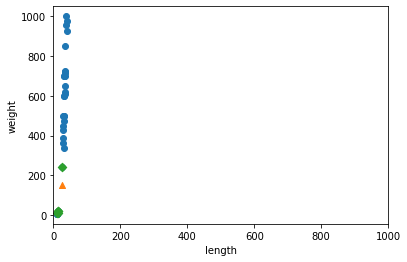

In [25]:
# x축의 범위를 y축의 범위와 동일하게 변경
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [27]:
# 평균, 표준편차를 이용해 표준점수 계산
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [29]:
# 표준 점수 계산

train_scaled = (train_input - mean) / std

In [30]:
# 수상한 도미도 동일하게 계산
new = ([25, 150] - mean) / std

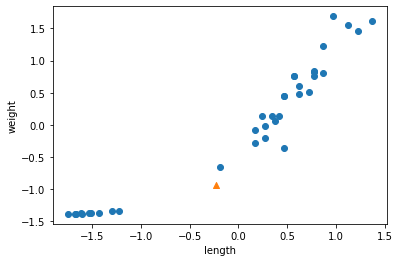

In [32]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [33]:
# scale 처리한 훈련 세트로 다시 학습
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [36]:
# 테스트 데이터도 훈련 세트의 평균과 표준편차로 변환
test_scaled = (test_input - mean) / std

In [37]:
kn.score(test_scaled, test_target)

1.0

In [38]:
if kn.predict([new]) == 0:
  print('빙어')
else:
  print('도미')

도미
